`ogr2ogr -f "GeoJSON" -t_srs crs:84 -lco COORDINATE_PRECISION=6 lada000b21a_e_PRECISION_6.geojson lada000b21a_e.shp`

In [2]:
import json
import geopandas as gpd

# Load GeoJSON data
with open(r"C:\Users\jorda\repos\StatCan\lada000b21a_e\lada000b21a_e.geojson") as f:
    data = json.load(f)

# Convert to GeoDataFrame and set CRS
gdf = gpd.GeoDataFrame.from_features(data['features'])
gdf.set_crs('EPSG:4326', inplace=True)

,geometry,ADAUID,DGUID,LANDAREA,PRUID
0,"MULTIPOLYGON (((-53.51451 47.69912, -53.51464 ...",10010001,2021S051610010001,941.3294,10
1,"POLYGON ((-52.78543 47.80961, -52.78542 47.809...",10010002,2021S051610010002,92.3865,10
2,"MULTIPOLYGON (((-53.12645 47.81702, -53.12663 ...",10010003,2021S051610010003,194.9791,10
3,"POLYGON ((-52.66902 47.66588, -52.66898 47.665...",10010004,2021S051610010004,34.9575,10
4,"POLYGON ((-52.73992 47.69568, -52.74026 47.694...",10010005,2021S051610010005,49.8515,10
...,...,...,...,...,...
5428,"MULTIPOLYGON (((-115.34503 67.89695, -115.3453...",62080004,2021S051662080004,538.9922,62
5429,"MULTIPOLYGON (((-95.82942 68.59941, -95.82932 ...",62080005,2021S051662080005,28.5462,62
5430,"MULTIPOLYGON (((-89.84909 68.53759, -89.84931 ...",62080006,2021S051662080006,5.0588,62
5431,"MULTIPOLYGON (((-107.96280 67.70120, -107.9628...",62080007,2021S051662080007,99.9450,62


In [ ]:
import matplotlib.pyplot as plt

# Create a new plot with specific size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the data to the plot
gdf.plot(ax=ax)

# Restrict the y-axis to latitudes less than 65 degrees
ax.set_ylim(None, 55)

# Display the plot
plt.show()

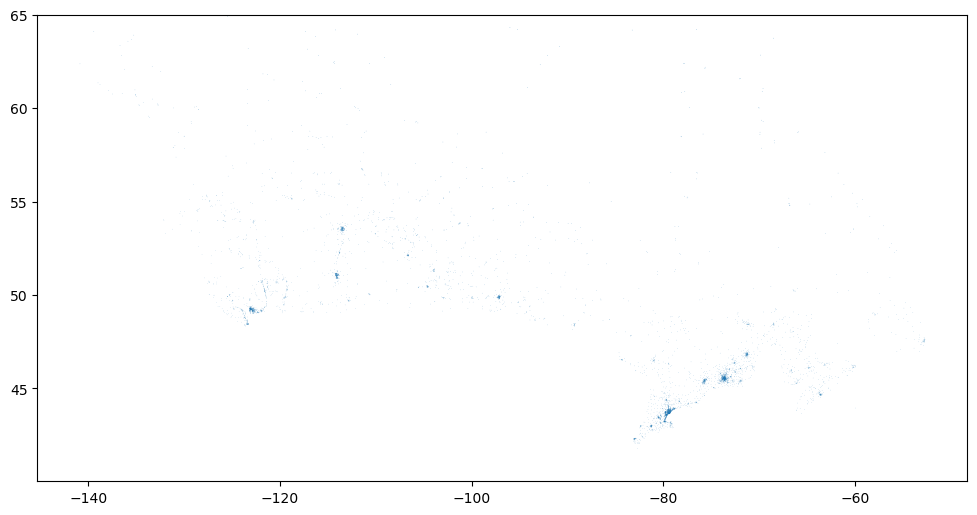

In [4]:
import h3
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create a copy of the GeoDataFrame for visualization experiments
gdf_copy = gdf.copy()

# Define the H3 resolution
h3_resolution = 7

# Generate H3 hexagons for the given coordinates (the coordinates of the geometry's centroids)
gdf_copy['hex_id'] = gdf_copy['geometry'].apply(lambda x: h3.geo_to_h3(x.centroid.y, x.centroid.x, h3_resolution))

# Define a function to convert H3 hexagons to geometries
def hex_to_geometry(hex_id):
    geo_boundary = h3.h3_to_geo_boundary(hex_id, geo_json=True)
    return Polygon(geo_boundary)

# Apply the function to get the geometry of each hexagon
gdf_copy['geometry'] = gdf_copy['hex_id'].apply(hex_to_geometry)

# Create a new plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the data to the plot
gdf_copy.plot(ax=ax)

# Restrict the y-axis to latitudes less than 65 degrees
ax.set_ylim(None, 65)

# Display the plot
plt.show()
